<a href="https://colab.research.google.com/github/DhanashriDNair/POCs/blob/master/Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
len(ytest)

10000

In [0]:
xtrain[20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
ytrain[200]

1

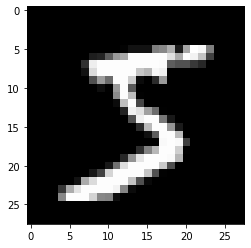

In [0]:
plt.imshow(xtrain[0],cmap='gray')
plt.show()

In [0]:
xtrain.shape

(60000, 28, 28)

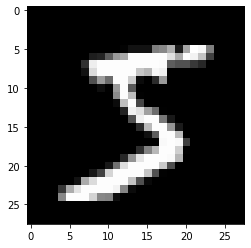

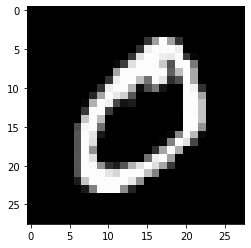

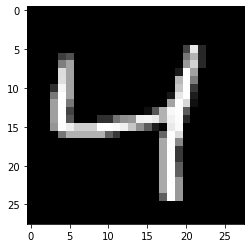

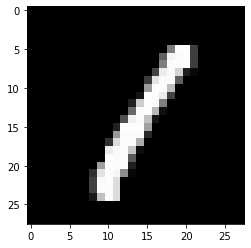

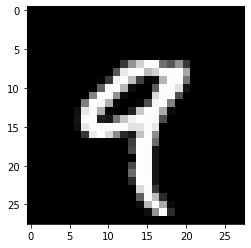

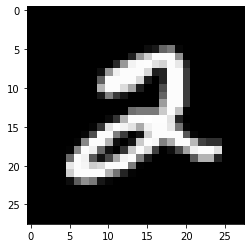

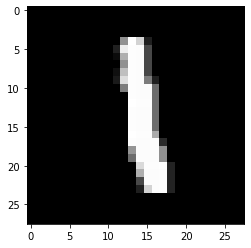

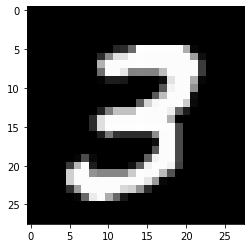

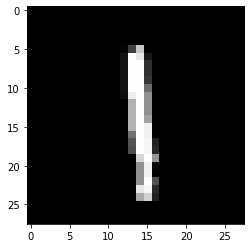

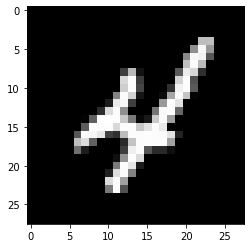

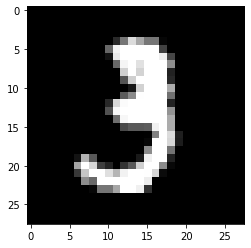

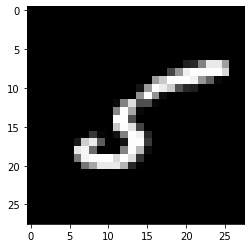

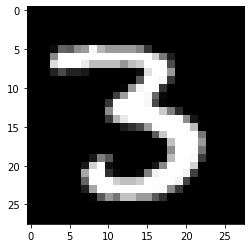

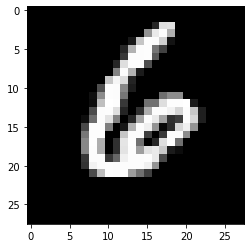

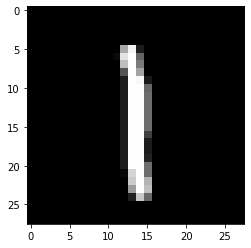

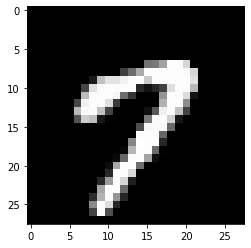

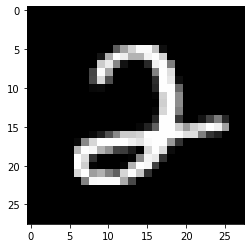

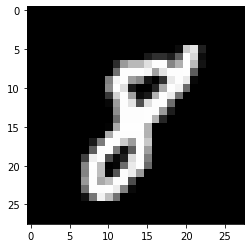

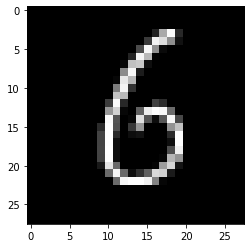

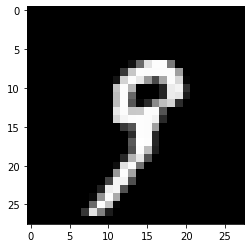

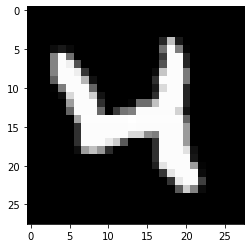

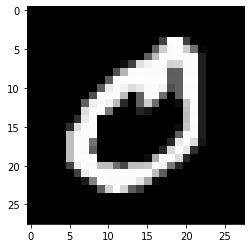

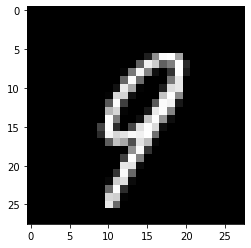

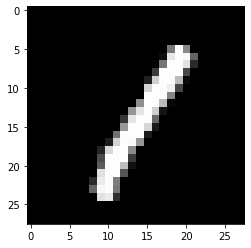

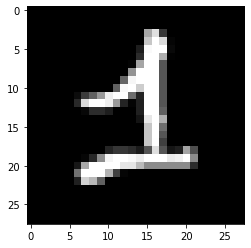

In [0]:
##first 25 samples 
for i in range(25):
  plt.imshow(xtrain[i],cmap='gray')
  plt.show()

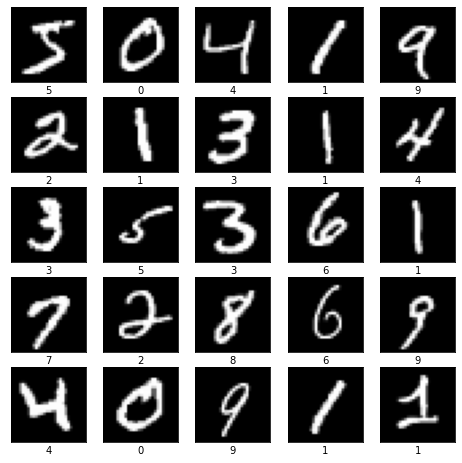

In [0]:
#### first 25 samples
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(ytrain[i])
  plt.imshow(xtrain[i],cmap="gray")
plt.show()

In [0]:
###Create the model
model = tf.keras.models.Sequential()

In [0]:
### Adding the layers
model.add(tf.keras.layers.Flatten())  ## input layer
model.add(tf.keras.layers.Dense(784,activation='relu'))  ##Hidden layer Take dimension 784 neuron
model.add(tf.keras.layers.Dense(640,activation='relu')) ##Hidden layer any value 
model.add(tf.keras.layers.Dense(64,activation='relu')) ##Hidden layer
model.add(tf.keras.layers.Dense(10,activation='softmax')) ##Output layer  10 neuron as 10 output 

In [0]:
### Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
### Scaling / Normalizing data(0-1)
xtrain=xtrain/255
xtest=xtest/255

In [0]:
model.fit(xtrain,ytrain,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3189 - accuracy: 0.9052
Epoch 2/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1270 - accuracy: 0.9666
Epoch 3/3
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0992 - accuracy: 0.9744


In [0]:
#### Predictions
predictions  = model.predict(xtest)

In [0]:
ytest[200]

3

In [0]:
predictions[200]

array([1.7459002e-04, 1.7453118e-03, 8.2349572e-03, 8.6437899e-01,
       2.8015373e-05, 6.0780616e-03, 3.4156332e-05, 2.0721187e-03,
       1.1481725e-01, 2.4365704e-03], dtype=float32)

In [0]:
np.argmax(predictions[200])

3

In [0]:
for i in range(20):
  print(ytest[i],end=" : ")
  print(np.argmax(predictions[i]))

7 : 7
2 : 2
1 : 1
0 : 0
4 : 4
1 : 1
4 : 4
9 : 9
5 : 5
9 : 9
0 : 0
6 : 6
9 : 9
0 : 0
1 : 1
5 : 5
9 : 9
7 : 7
3 : 3
4 : 4


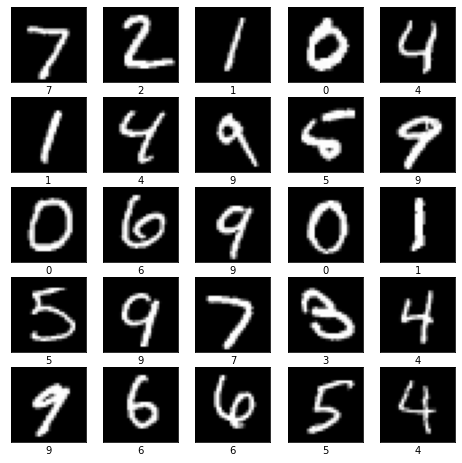

In [0]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(np.argmax(predictions[i]))
  plt.imshow(xtest[i],cmap='gray')
plt.show()

In [0]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.1334 - accuracy: 0.9651


[0.1334436535835266, 0.9650999903678894]

In [0]:
import cv2

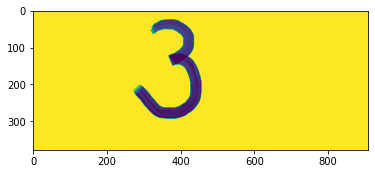

In [37]:
img_array = cv2.imread("a.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array)

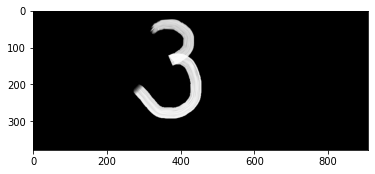

In [39]:
img_array=cv2.bitwise_not(img_array)
plt.imshow(img_array,cmap=plt.cm.binary)

In [40]:
img_array.shape

(378, 909)

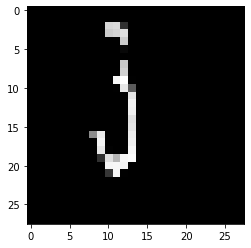

In [41]:
new_array = cv2.resize(img_array,(28,28))
plt.imshow(new_array,cmap=plt.cm.binary)

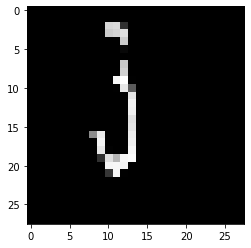

In [42]:
test_image = new_array/255
plt.imshow(test_image,cmap=plt.cm.binary)

In [0]:
predicted_image = model.predict(np.array([[test_image]]))

In [45]:
np.argmax(predicted_image)

8